출처 
https://www.kaggle.com/c/melbourne-university-seizure-prediction/discussion/23552

https://www.kaggle.com/aperezhortal/eda-on-the-frequency-domain-fft

https://www.wavemetrics.com/products/igorpro/dataanalysis/signalprocessing/powerspectra

https://kor.midasuser.com/nfx/techpaper/keyword_view.asp?pg=13&sk=&bid=70&nCat=&nIndex=&sHtml=&idx=283

https://www.kaggle.com/theoviel/fast-fourier-transform-denoising

1. 주파수(Frequency)
2. 크기(Magnitude)
3. 위상(Phase)이 다른 정현파(sinusolida signal) 

 푸리에변환 - 조합된 정현파의 합 신호에서 그 신호를 구성하는 정현파들을 각각 분리하는 방법 

In [41]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [42]:
is_local = False
if (is_local):
        print("fail")
else:
        PATH = "./input/earthquake_data/"

In [43]:
file_len = len(os.listdir(PATH))
f"파일 갯수는 {file_len!r} 입니다 "

'파일 갯수는 7 입니다 '

In [44]:
data_list = os.listdir(PATH)
data_list

['3332325_0.dat',
 '3332325_15.dat',
 '3332325_30.dat',
 '3332325_45.dat',
 '3332325_60.dat',
 '3332325_75.dat',
 '3332325_90.dat']

In [45]:
path = PATH + data_list[0] 
path
data_df = pd.read_csv(path, names=['time', '_x', '_y', '_z'],header=None, error_bad_lines=False )

In [46]:
data_df.head(5)

,time,_x,_y,_z
0,1.325347e+09,-3.197749e-08,1.670632e-08,-2.633049e-10
1,1.325347e+09,2.591352e-08,-1.209819e-08,1.488334e-09
2,1.325347e+09,-2.678963e-09,-1.119580e-08,-1.555271e-09
3,1.325347e+09,5.040576e-09,1.289168e-08,5.447114e-09
4,1.325347e+09,-7.528876e-09,-3.073363e-09,-1.633640e-08


In [47]:
signals = data_df.copy()
signals = signals.drop('time',axis=1)

In [48]:
signals.head(5)

,_x,_y,_z
0,-3.197749e-08,1.670632e-08,-2.633049e-10
1,2.591352e-08,-1.209819e-08,1.488334e-09
2,-2.678963e-09,-1.119580e-08,-1.555271e-09
3,5.040576e-09,1.289168e-08,5.447114e-09
4,-7.528876e-09,-3.073363e-09,-1.633640e-08


In [49]:
signals.tail(5)

,_x,_y,_z
8593,4.618772e-08,-1.682100e-08,-1.452421e-08
8594,-1.443892e-08,6.889643e-09,-1.352517e-08
8595,-2.227191e-08,6.121667e-09,6.827939e-09
8596,3.767037e-08,-4.057164e-08,6.319243e-09
8597,-1.442001e-08,1.171201e-08,8.008630e-09


In [50]:
np_signals = np.array(signals).T.reshape((1, 3, len(signals['_x'])))

In [51]:
print(np_signals.shape[0])
print(np_signals.shape[1])
print(np_signals.shape[2])

1
3
8598


In [52]:
np_signals

array([[[-3.19774856e-08,  2.59135169e-08, -2.67896322e-09, ...,
         -2.22719062e-08,  3.76703695e-08, -1.44200051e-08],
        [ 1.67063229e-08, -1.20981905e-08, -1.11958005e-08, ...,
          6.12166685e-09, -4.05716360e-08,  1.17120133e-08],
        [-2.63304862e-10,  1.48833446e-09, -1.55527071e-09, ...,
          6.82793905e-09,  6.31924318e-09,  8.00862955e-09]]])

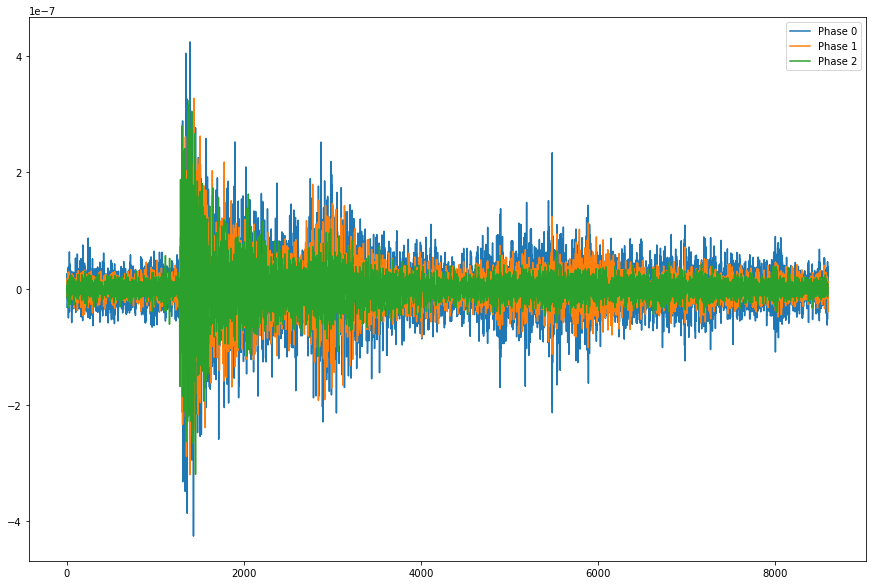

In [53]:
plt.figure(figsize=(15, 10))
plt.plot(np_signals[0, 0, :], label='Phase 0')
plt.plot(np_signals[0, 1, :], label='Phase 1')
plt.plot(np_signals[0, 2, :], label='Phase 2')
plt.legend()
plt.show()

In [54]:
def sample(signal, kernel_size):
    sampled = np.zeros((signal.shape[0], signal.shape[1], signal.shape[2]//kernel_size))
    for i in range(signal.shape[2]//kernel_size):
        begin = kernel_size * i
        end = min(kernel_size * (i + 1), signal.shape[2])
        sampled[:, :, i] = np.mean(signal[:, :, begin:end], axis=2)
    return sampled

In [55]:
sampled = sample(np_signals, 10)

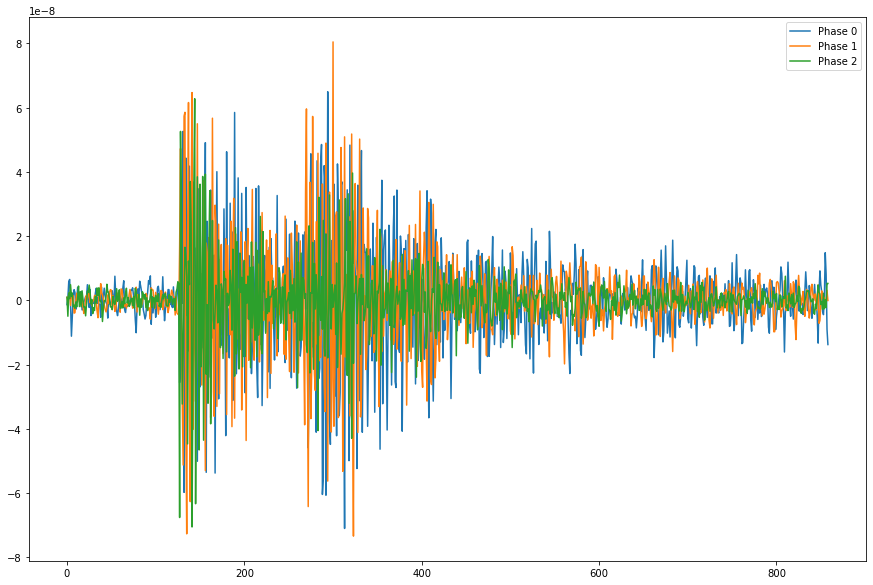

In [56]:
plt.figure(figsize=(15, 10))
plt.plot(sampled[0, 0, :], label='Phase 0')
plt.plot(sampled[0, 1, :], label='Phase 1')
plt.plot(sampled[0, 2, :], label='Phase 2')
plt.legend()
plt.show()

# FFT

In [57]:
from numpy.fft import *

In [58]:
def fft_total_data(fmax, data):
    #여기서는 samplign data의 정보는 없다
    #1초에 얼마 2초에 얼마 했느지 정보는 없음 ...
    dt = 1 / fmax  # samplign period ,sampling rate
    n = len(data)
    Fs = dt
    T = n/Fs
    f = np.arange(0, n)
    freq = f/T
    #freq = freq[range(int(n / 2))]
    Y = np.fft.fft(data) / n
    #Y = Y[range(int(n / 2))]

    plt.plot(f[0:int(n / 2 + 1)], np.abs(Y[0:int(n / 2 + 1)]))
    plt.xlabel('frequency(Hz)');
    plt.ylabel('abs(xf)');
    plt.show()

    fft_data = np.fft.fft(data)

In [59]:
y_data = sampled[0, 0, :]

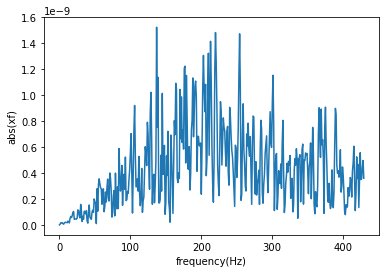

In [60]:
fft_total_data(20, y_data)

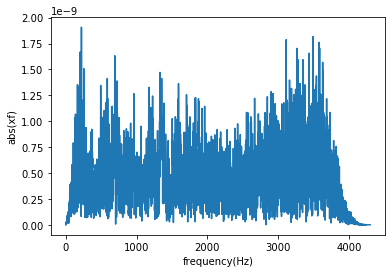

In [61]:
fft_total_data(20,  np_signals[0, 0, :])

In [62]:
np_signals[0, 0, :]
len(signals['_x'])

8598

# Speriodogram
http://thomas-cokelaer.info/software/spectrum/html/user/ref_fourier.html

In [63]:
from spectrum import *
from pylab import plot
p = speriodogram(np_signals[0, 0, :])
plot(p)

NameError: name 'speriodogram' is not defined

In [64]:
from pylab import *
from spectrum import *
semi_data=semilogy(speriodogram(np_signals[0, 0, :], detrend=False, sampling=1024), marker='o')
grid(True)

NameError: name 'speriodogram' is not defined

In [65]:
from pylab import *
from spectrum import *
semi_data=semilogy(speriodogram(sampled[0, 0, :], detrend=False, sampling=1024), marker='o')
grid(True)

NameError: name 'speriodogram' is not defined

In [66]:
semi_data

NameError: name 'semi_data' is not defined

In [67]:
from scipy import signal

f, P = signal.periodogram(np_signals[0, 0, :], len(signals['_x']), nfft=2**12)

plt.subplot(211)
plt.plot(f, P)
plt.xlim(100, 1900)
plt.title("선형 스케일")

plt.subplot(212)
plt.semilogy(f, P)
plt.xlim(100, 1900)
plt.ylim(1e-5, 1e-1)
plt.title("로그 스케일")

plt.tight_layout()
plt.show()

AttributeError: module 'scipy.signal' has no attribute 'periodogram'

In [68]:
#

##  Haar wavelet coefficients

## Mutual information /Cross Entropy